# Exam 1 

### <font color=green>Read each question carefully and use R to show how you calculated each answer</font>

### 1. In a congested city when it rains (which happens one third of the days), there is 50% probability that there will be heavy traffic. On the other hand, if it doesn’t rain, then the probability gets reduced to only 25%. Now, if its rainy and there is heavy traffic, there is 50% chance hat I will arrive late to work, but only 1/8 if it is sunny and no traffic. I will be late only 1/4 of the time if there is rain and no traffic or not rain and traffic.
<br>
<font color=blue> If I today I arrived late to work, what is the probability that we had rain that day.? </font>

<br>

<font color=red>Hint (you can use tree diagrams and conditional probabilities to find the answer)</font>

In [2]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [131]:
# Event A = Rain
# Event B = Heavy Traffic
# Event C = Late for Work
#find prob A given C

# Probability of A - Rain
A <- 1/3 

# Probability of not A - No Rain
notA <- 2/3
 
 
# Probability (B|A) - Heavy Traffic Given Rain
BgivenA <- 0.5
 
# Probability (B|not A) - Heavy Traffic Given No Rain
BgivennotA <- 0.25

#No Traffic given No Train
notBgivennotA <- 0.75

#Probability (notB|A) - No Traffic Given Rain
notBgivenA <- 0.5
 
# Probability (C|AandB) - Late given Heavy Traffic AND Rain
CgivenAandB <- 0.5
 
# Probability (C|not A and not B) - Late given No Rain and No Traffic
CgivennotAandnotB <- 0.125

#Probabily (C|A and not B)
CgivenAandnotB <- 0.25

#Probability (C|not A and B)
CgivennotAandB <- 0.25

#Probability of A and B and C
ABC = A*CgivenAandB  #lategivenrain
AnotBC = A*CgivenAandnotB #lategivenrainbutnottraffic

CgivenA = ((0.5*0.5*1/3)+(0.25*0.5*1/3))/((0.5*0.5*1/3)+(0.25*0.5*1/3)+(2/3)*(.25*.25+0.75*0.125))
cat("The probability that it rained given that I was late for work is", CgivenA)

The probability that it rained given that I was late for work is 0.5454545

### 2. we classify 2000 email in two groups: 1000 emails as spam and 1000 emails as non-
spam. 210 of the spam emails contained the phrase This isn’t spam, 99 had the word prize and 110 the word prince. Of the 99 that contained the word prize, 79 also contained the word prince. On the other hand, of the 1000 non-spam emails, only 23 had the phrase this isn’t spam, 80 the word prize and 110 the word prince. Of the 80 that contained the word prize 8 also contained the word prince.

<br>
<font color=blue>Assuming that the a priori probability of any message being spam is 0.5, what is the probability that an email is spam given it contains the phrase This isn't spam</font>


In [48]:

prob_spam = 0.5
prob_nonspam= 0.5
prob_spam_notspam = 0.21
prob_spam_prize = 0.099
prob_spam_prince = 0.11
prob_nonspam_notspam = 0.023
prob_nonspam_prize = 0.080
prob_nonspam_prince = 0.11

prob_spamgivennotspam = (prob_spam*prob_spam_notspam)/((prob_spam*prob_spam_notspam)+(prob_nonspam_notspam*prob_nonspam))
cat("There is a" , prob_spamgivennotspam, "chance an email with the phrase 'This isn't spam.' is spam.")

There is a 0.9012876 chance an email with the phrase 'This isn't spam.' is spam.

### 3. The Blood Transfusion Service Center in Hsin-Chu City, Taiwan collects data to understand donation habits from a center that passes their blood transfusion service bus to one university in Hsin-Chu City. Data is collected on whether the person donates or not in March as a binary variable, and multiple categorical variables (data obtained from [http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/](http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/))

#### R (Recency - months since last donation),
#### F (Frequency - total number of donation),
#### M (Monetary - total blood donated in c.c.),
#### T (Time - months since first donation), and

<br>
<font color=blue> Using contingency tables, calculate the probability that a person donates blood in march given that they donated blood in a Frequency between 18 and 33 times </font>
<br>
<br>
<font color=red> The frequency variable should be converted to a three way categorical variable 1 = 1-17; 2 = 18-33; 3 = 34-50</font>


In [94]:
## install packages
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")

In [95]:
blood = read.csv(file = "http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")

In [87]:
##convert blood frequency to 3-way categorical variable
frequency <- case_when(between(blood$Frequency..times, 1, 17) ~ '1',
                  between(blood$Frequency..times, 18, 33) ~ '2',
                  between(blood$Frequency..times, 34, 50) ~ '3'
                  )
blood$Frequency..times. <- as.factor(frequency)

In [132]:
blood.freq.march.df <- ##calls the variable
  blood %>%
  group_by(Frequency..times., whether.he.she.donated.blood.in.March.2007) %>%
  summarize(n = n())

freq.marginal.df <- 
  blood.freq.march.prop.df %>%
  group_by(Frequency..times.) %>%
  summarize(marginal = sum(prop))

march.marginal.df <- 
  blood.freq.march.prop.df %>%
  group_by(whether.he.she.donated.blood.in.March.2007) %>%
  summarize(marginal = sum(prop))

joint.prob <- 
  blood.freq.march.prop.df %>%
  filter(Frequency..times. == "2", whether.he.she.donated.blood.in.March.2007 == "1") %>%
  .$prop

marg.prob <- 
  freq.marginal.df %>%
  filter(Frequency..times. == "2") %>%
  .$marginal

cond.prob <- joint.prob / marg.prob
cat("The conditional probability that a person donates blood in March given that they donated blood in a between 18 and 33 times is ", cond.prob)


### 4. In a class there are 18 math majors and 25 physics majors. 12 math majors are females as well as 20 physics majors,  

#### <font color=blue>Find the probability that the student selected at random is a math major or a male. </font>

In [115]:
majors <- matrix(c(6,5,11, 12,20,32, 18,25, 43),ncol=3,byrow=TRUE)
colnames(majors) <- c("Math","Physics", "Total")
rownames(majors) <- c("Males","Females","Total")
majors <- as.table(majors)
majors

prob_male = 11/43
prob_math = 18/43
prob_maleANDmath = 6/43

prob_mathORmale = prob_math + prob_male - prob_maleANDmath
cat("The prob that a student selected at random is a math major or a male is", prob_mathORmale)

        Math Physics Total
Males      6       5    11
Females   12      20    32
Total     18      25    43

The prob that a student selected at random is a math major or a male is 0.5348837

### 5. There are 6 cars in a car shop out which 3 are defective. If 2 cars are picked randomly, 

#### <font color=blue>Find the probability that at least one is defective.</font>

In [137]:
#assuming no replacement
total_cars = 6
def_cars = 3
prob_no_def_in_two_picks = 3/6 * 2/5
prob_one_def = 1-prob_no_def_in_two_picks
prob_one_def

[1] 0.8

### 6. In the past, for every attempt to make a call there was a 70% probability of getting the call. 

#### <br><font color=blue> a. Calculate the probability of having  12 successes in 20 attempts. <br> b. Plot the distribution and describe the shape</font>

[1] 0.1143967

The distribution is left skewed.

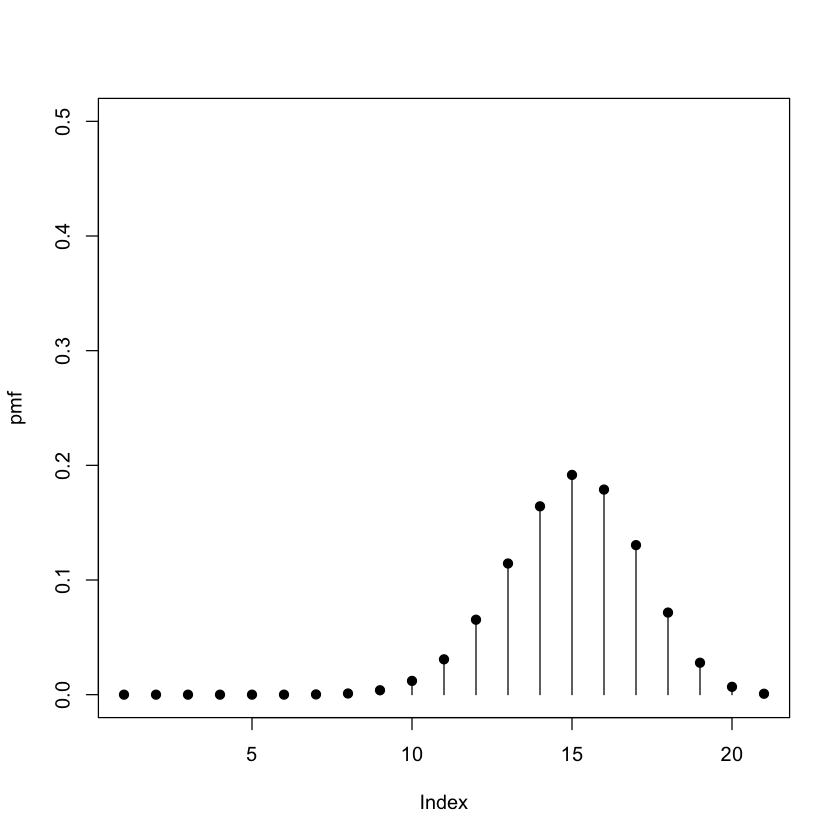

In [147]:
dbinom(12,size=20,prob=.70)

pmf <- dbinom(0:20, size = 20, prob = 0.70)
plot(pmf, type = "h", ylim= c(0,0.5))
points(pmf,pch=19)

cat("The distribution is left skewed.")

### 7. A study has shown that 10 in 250 people are infected with a common cold virus, however, the gold standard tests although accurate are not 100% perfect, where in fact if a person has the virus the probability of testing positive is 90%.

#### <br><br> <font color=blue>What the the probability that a person chosen at random has the virus and tests positive?</font>

In [152]:
# p(B|A) = p(A and B)/P(A)
# p(A and B)= p(B|A)*p(A)
# A = has the common cold, B = has a positive test
common_cold_prob = 10/250 #p(A)
pos_test_given_cold = 0.90  #p(B|A)


random_pos_test = pos_test_given_cold*common_cold_prob
random_pos_test

[1] 0.036

### 8. In an Italian gambling game, a win is when I get at least 11 when three six-sided dice are thrown. Run a 100000 trial simulation of the above game to answer the following questions: 

<br><br> <font color=blue> 1. Would I, in the long run win the game? 
<font color=blue><br> 2. Which is more likely when throwing three dice: an 11 or a 12? 
<font color=blue><br> 3. What is the probability of getting a sum no greater than 7 or no less then 15 when throwing three dice </font>

In [171]:
n = 100000
rolldieonce = function(n) sample(1:6, n, rep = T)
    
roll1 = NULL
roll2 = NULL
roll3 = NULL
success = 0
for (i in 1:n) {
    roll1[i] = rolldieonce(1)
    roll2[i] = rolldieonce(1)
    roll3[i] = rolldieonce(1)
    if ((roll1[i] + roll2[i] + roll3[i]) >= 11) {
        success = success + 1    #edited the above conditional statement for part 2 & 3
    }
}
print(success)



[1] 49743


1. No you would likely lose, or very nearly break even. The probability of success if 0.49825.
2. 11 is more likely. In 100,000 rolls, the probability of 12 is .11431. In 100,000 rolls the probability of 11 is 0.12589
3. 0.255

### 9. In a company 3/4 of the females are single, 

### <br><br> <font color=blue> Calculate the probability that within the first 5 randomly selected females we find the first single woman? <br> <font color=blue> In average in how many people we need to select before find a single female?</font>

In [225]:
prob_first_single_fem = 1 - dbinom(0,5,0.75)
prob_first_single_fem

[1] 0.9990234

In [232]:
mean = 1/0.75
mean
cat("The mean is", mean, "so we need to select just over one person on average, or two people before finding a single female.")

[1] 1.333333

The mean is 1.333333 so we need to select just over one person on average, or two people before finding a single female.

### 10. Lets use a mouse random walk The Closed Maze, where a mouse always start on the first chamber and can move randomly to different chambers until it finds a cheese in chambers 7 or 9. From the following diagram calculate:

![title](Mouse_random.png)

<br><br> <font color=blue> 1. The transition matrix
<br> <font color=blue>2. Write a function that simulates this random walk (5000 times ) the mouse starts always from the 1st chamber, 
<br> <font color=blue>3. Plot the mouse random walk simulation using **ONE** of the following vector (steps - N) sizes (10,15, 50,100), 
<br><font color=blue>4. what are the probabilities of finishing in each chamber at each one of these steps sizes?  (table of 4 rows (vector size -N) vs 9 columns (chambers))<br> 


In [348]:
P=matrix(0,9,9)

P[1,]=c(0, 0.5, 0, 0.5, 0, 0, 0, 0, 0)
P[2,]=c(1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0)
P[3,]=c(0, 0.5, 0, 0, 0, 0.5, 0, 0, 0)
P[4,]=c(1/3, 0, 0, 0, 1/3, 0, 1/3, 0, 0)
P[5,]=c(0,1/4, 0, 0.25, 0, 0.25, 0, 0.25, 0)
P[6,]=c(0,0, 1/3, 0, 1/3, 0, 0, 0, 1/3)
P[7,]=c(0, 0, 0, 0, 0, 0, 1, 0, 0)
P[8,]=c(0, 0, 0, 0, 1/3, 0, 1/3, 0, 1/3)
P[9,]=c(0, 0, 0, 0, 0, 0, 0, 0, 1)


Markov2 = function(N, Pi0, P){ #N = number of steps, N0 = initial probs, P matrix
  P0 = c(.1,0.1,0.199,0.1,0.1, 0.1, 0.2, 0.2, .1)
  P = P*P0
  X=matrix(0,1,N)
  a = 1 ##Start the random walk in position 3
  X[1]=a
  for (i in 2:N) {
    a=sample(c(1:9),1,replace=T, P[a,])
    X[i]=a
  }
  b = as.vector(X)
  return(b)
}


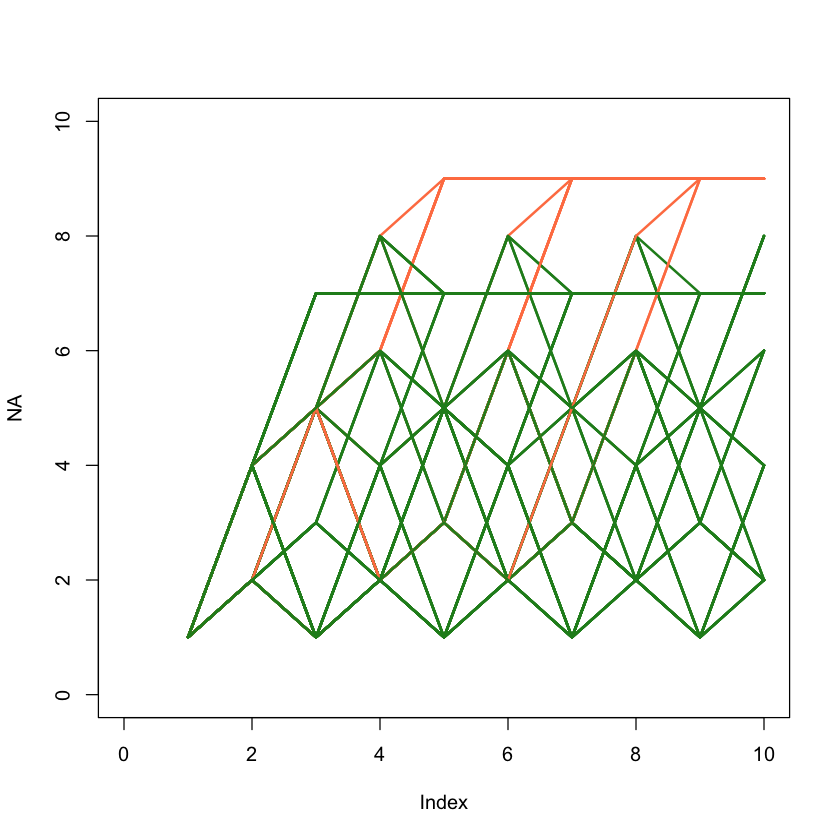

In [349]:
##Making the plot with 5000 runs - and a walk size of 50 steps
N =10
plot(NA, xlim=c(0,10), ylim=c(0,10))#empty plot
datas = matrix(ncol = 10, nrow = 5000)
for (i in 1:100){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==9)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}

1,2,5,2,1,4,1,2,5,2,3,2,1,2,5
1,4,1,2,5,6,5,8,9,9,9,9,9,9,9
1,4,7,7,7,7,7,7,7,7,7,7,7,7,7
1,2,5,4,5,8,5,8,5,4,5,4,1,2,5
1,2,3,6,3,2,3,2,1,4,1,2,3,6,5
1,4,5,2,1,4,5,6,3,2,5,8,5,8,5
1,4,5,2,3,2,3,2,3,6,3,6,9,9,9
1,2,1,4,7,7,7,7,7,7,7,7,7,7,7
1,2,3,6,5,4,7,7,7,7,7,7,7,7,7
1,2,1,4,1,2,1,2,3,2,3,6,5,4,5
1,2,1,4,7,7,7,7,7,7,7,7,7,7,7


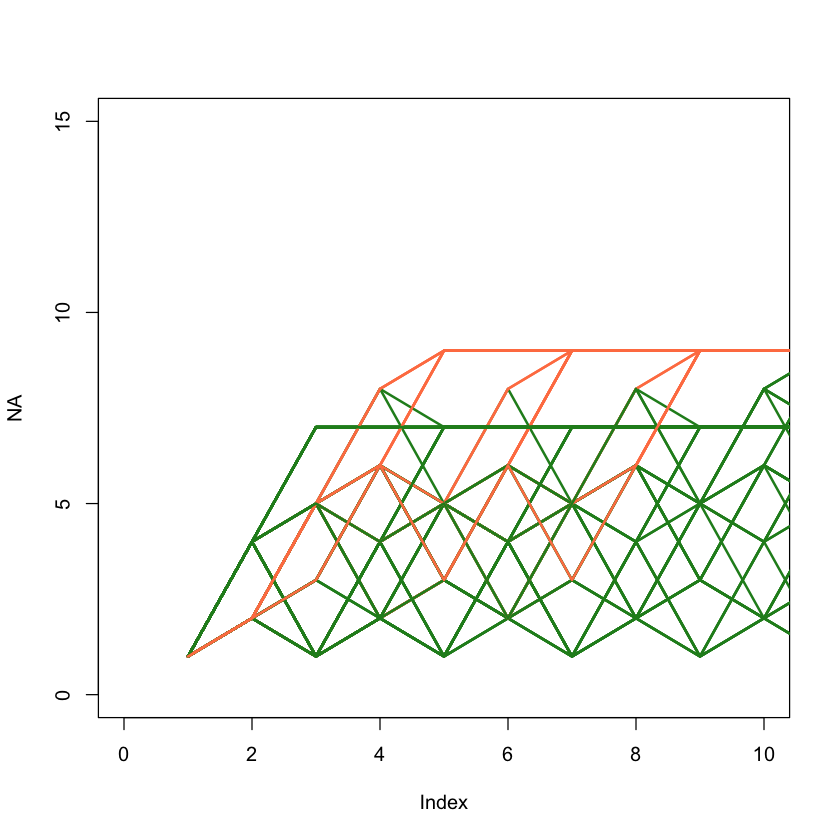

In [350]:
N =15
plot(NA, xlim=c(0,10), ylim=c(0,15))#empty plot
datas = matrix(ncol = 15, nrow = 5000)
for (i in 1:100){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==9)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}
datas

1,2,1,4,5,8,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7
1,4,7,7,7,7,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7
1,2,5,2,3,2,1,2,5,4,⋯,7,7,7,7,7,7,7,7,7,7
1,4,5,8,5,6,9,9,9,9,⋯,9,9,9,9,9,9,9,9,9,9
1,2,1,4,7,7,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7
1,2,3,2,1,2,3,2,5,6,⋯,9,9,9,9,9,9,9,9,9,9
1,2,3,6,9,9,9,9,9,9,⋯,9,9,9,9,9,9,9,9,9,9
1,2,1,4,5,2,3,2,5,2,⋯,9,9,9,9,9,9,9,9,9,9
1,4,5,6,5,4,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7
1,2,1,4,1,4,5,4,1,4,⋯,7,7,7,7,7,7,7,7,7,7
1,4,5,4,7,7,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7


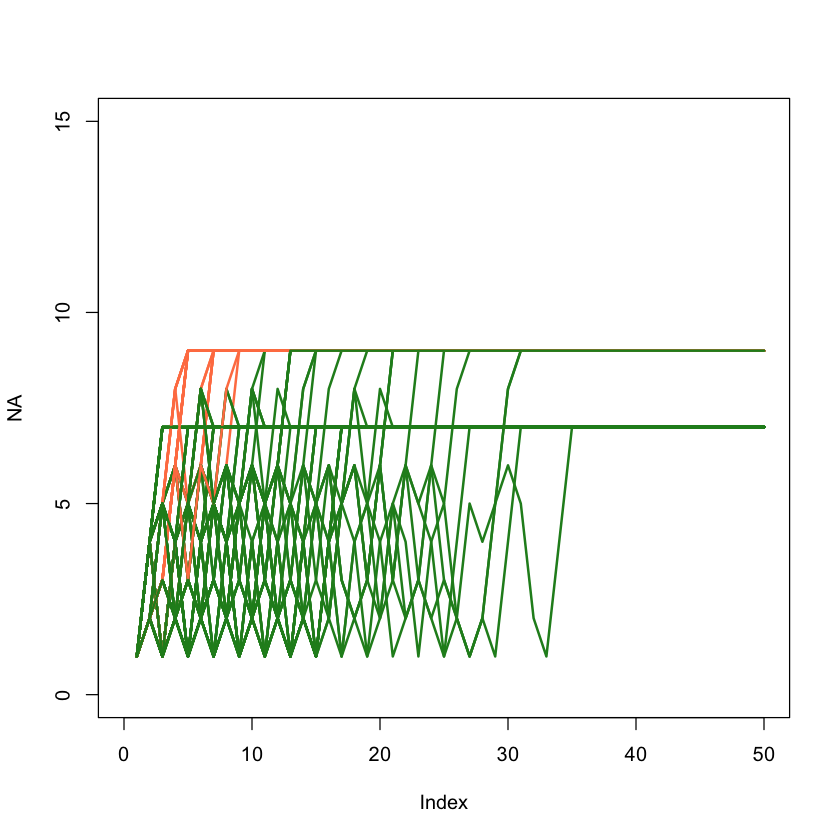

In [345]:
N =50
plot(NA, xlim=c(0,50), ylim=c(0,15))#empty plot
datas = matrix(ncol = 50, nrow = 5000)
for (i in 1:100){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==9)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}


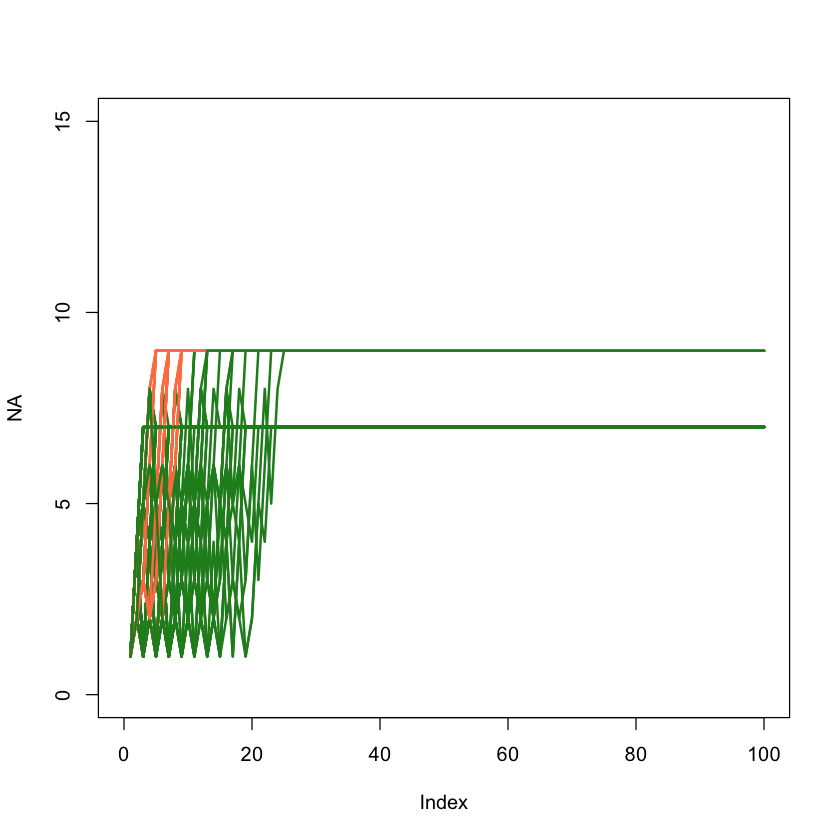

In [344]:
N =100
plot(NA, xlim=c(0,100), ylim=c(0,15))#empty plot
datas = matrix(ncol = 100, nrow = 5000)
for (i in 1:100){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==9)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}
